<a href="https://colab.research.google.com/github/ghenaop/ProyectoFinal/blob/main/TP1/Desaf%C3%ADo_Final_%2BHenaoPenenrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Prepago**

El dataset seleccionado corresponde a la información sobre la cantidad de usuarios del servicio móvil prepagado en cuanto a churn, gross y reconexiones, que ayuda a entender el comportamiento de las metricas en un periodo, pues cuenta información por día de cada una de ellas.

El problema es obtener un modelo de proyección que permita determinar el comportamiento de las métricas de acuerdo con la data histórica.



## **Abstract:**

El dataframe corresponde al sector de telecomunicaciones, telefonía móvil prepagado. El objetivo es predecir y entender el comportamiento de las ventas, las reconexiones de servicio y la baja de clientes de la base para así entregarle al negocio herramientas para accionar a traves de tácticos.


**Audiencia** áreas de BI, comercial, y oferta.
**Motivación** las predicciones actuales se realizan en excel, con esto realmente se tendría un modelo predictivo.


## **Definición de Objetivo:**

Analizar el comportamiento del prepagado móvil en el tiempo de la data, para entender sus variaciones diarias y mensuales en los eventos de Gross, Churn y Reconexiones y así identificar patrones que ayuden a la toma de decisiones estratégicas basadas en datos.

## **Contexto Comercial:**

Con lo anterior se busca entregarle herramientas a la parte comercial, financiera y de gestión de la base de la compañía para que implemente estrategias de adquisición y retención, planificación de tácticos y oportunidades de reconexión de los usuarios, que al final pueda dar netos positivos.

## **Problema Comercial**

Mejorar la eficiencia operativa de la parte comercial, financiera y de gestión de la base para la toma de decisiones estratégicas.


## **Preguntas/Hipótesis**

1. ¿Existe estacionalidad en los eventos de CHURN, GROSS y RECONEXIONES?
Hipótesis: Aumento de eventos en fechas especiales o cambios tarifarios.

2. ¿Existe variación en el comportamiento del cliente a lo largo del mes?
Hipótesis: Aumento de Churn al final del mes por vencimiento de planes prepagados y Aumento de reconexiones al principio del mes.

3. ¿Existe una relación significativa entre CHURN, GROSS y RECONEXIONES?
Hipótesis: El CHURN puede tener una correlación negativa con el GROSS, sin embargo para este ejercicio se dejó el CHURN con valores positivos, y puede tener una relación positiva con las RECONEXIONES.

## Conexiones

In [ ]:
# Importar librerias
import pandas as pd  # Dataframes
import numpy as np  # Cálculos con arrays
import calendar # Funciones relacionadas con el calendario
import matplotlib.pyplot as plt  # Crear gráficos
from matplotlib.animation import FuncAnimation # Para animación
from IPython.display import HTML # Para mostrar
import plotly.express as px # Para animación
import plotly.graph_objects as go # Para animación
from plotly.subplots import make_subplots
import seaborn as sns  # Visualización de datos
import scipy.stats as stats  # Operaciones estadísticas
from statsmodels.tsa.stattools import adfuller  # Test de Dickey-Fuller
from scipy.stats import chi2_contingency  # Test de chi-cuadrado
from scipy.stats import f_oneway  # Test de ANOVA
from sklearn.linear_model import LinearRegression  # Modelos de regresión lineal
from sklearn.model_selection import train_test_split  # Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.decomposition import PCA  # Análisis de componentes principales
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor  # Modelos de árboles de decisión
from sklearn.neighbors import KNeighborsClassifier  # Mdelos KNN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN  # Algoritmos de clustering
from sklearn.metrics import accuracy_score, confusion_matrix  # Métricas modelos de clasificación
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  # Preprocesamiento de datos
from sklearn.impute import SimpleImputer  # Faltantes en los datos
from sklearn.compose import ColumnTransformer  # Transformaciones específicas a columnas
from sklearn.pipeline import Pipeline  # Pipelines de procesamiento de datos y modelos
from sklearn.metrics import mean_squared_error, r2_score  # Métrica modelos de regresión
from sklearn.pipeline import make_pipeline  # Crear pipelines
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier
from sklearn.metrics import classification_report # función classification_report
from statsmodels.tsa.arima.model import ARIMA # ARIMA
from xgboost import XGBClassifier # XGBoost
from sklearn.svm import SVC # SVC (Support Vector Classifier)
from sklearn.model_selection import GridSearchCV # busca conjunto de parámetros especificado para un modelo ML
from imblearn.over_sampling import SMOTE # equilibrar clases desbalanceadas en un conjunto de datos
from statsmodels.tsa.statespace.sarimax import SARIMAX # Extensión de Arima
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold # Validación cruzada
from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.naive_bayes import GaussianNB # GaussianNB
from sklearn.neural_network import MLPClassifier # MLPClassifier



In [ ]:
# Conexión google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Conexión Dataset

drive_prepagada = '/content/drive/MyDrive/Dataset/Prepago.xlsx'

In [ ]:
# Leer el archivo en dataframe

df_prepagado = pd.read_excel(drive_prepagada)

# Mostrar las primeras 5 líneas del dataframe

print(df_prepagado.head())

       FECHA  DIA UNIDAD_NEGOCIO        DESCRIPCION SUBDESCRIPCION  \
0 2023-01-01    1         MOBILE  Cancelacion Linea            NaN   
1 2023-01-01    1         MOBILE  Cancelacion Linea            NaN   
2 2023-01-01    1         MOBILE             Fraude            NaN   
3 2023-01-01    1         MOBILE      Mig Pos a Pre            NaN   
4 2023-01-01    1         MOBILE      Mig Pre a Pos            NaN   

   AR_MIC_ST_RSN_KEY                     RAZON TIP_PORTACION    MES  YEAR  \
0                 42        CANCELACION_FRAUDE           NaN  ENERO  2023   
1                 51  SUSP_ROBO_PERD_CHIP_IMEI           NaN  ENERO  2023   
2                140         RECONEXION_FRAUDE           NaN  ENERO  2023   
3                138     RECONEX_MIGRA_POSPAGO           NaN  ENERO  2023   
4                 60    CAMBIO_PREPAGO_POSPAGO           NaN  ENERO  2023   

  TELEFONIA OPERADOR    DIA_SEM  CHURN  GROSS  RECONEXION  
0   PREPAGO      NaN  DOMINGO     19.0    NaN         Na

## Análisis Exploratorio de Datos (EDA) Inicial

In [ ]:
# Información de campos

df_prepagado.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10091 entries, 0 to 10090
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FECHA              10091 non-null  datetime64[ns]
 1   DIA                10091 non-null  int64         
 2   UNIDAD_NEGOCIO     10091 non-null  object        
 3   DESCRIPCION        10088 non-null  object        
 4   SUBDESCRIPCION     5497 non-null   object        
 5   AR_MIC_ST_RSN_KEY  10091 non-null  int64         
 6   RAZON              10091 non-null  object        
 7   TIP_PORTACION      5021 non-null   object        
 8   MES                10091 non-null  object        
 9   YEAR               10091 non-null  int64         
 10  TELEFONIA          10091 non-null  object        
 11  OPERADOR           5021 non-null   object        
 12  DIA_SEM            10091 non-null  object        
 13  CHURN              4865 non-null   float64       
 14  GROSS 

In [ ]:
# Muestra la cantidad de filas y columnas
df_prepagado.shape

(10091, 16)

#### Variables Potenciales
1. Descripción: Indica el tipo de medida del registro
2. Periodo: concatenado de año y mes
3. Día semana: corresponde a los días de la semana
4. Fecha
5. Churn: cantidad de usuarios que han churneado
6. Reconexion: cantidad de usuarios reconectado al servicio luego de una suspensión, fraude o migración
7. Gross: corresponde a la cantidad de ventas realizadas

## Data Wrangling

In [ ]:
# Filtrar el DataFrame para obtener solo las filas con UNIDAD_NEGOCIO igual a 'MOBILE'
df_prepagado_mobile = df_prepagado.loc[df_prepagado['UNIDAD_NEGOCIO'] == 'MOBILE']

# Realizar una copia del DataFrame
df_prepagado_mobile = df_prepagado_mobile.copy()

df_prepagado_mobile.head()

,FECHA,DIA,UNIDAD_NEGOCIO,DESCRIPCION,SUBDESCRIPCION,AR_MIC_ST_RSN_KEY,RAZON,TIP_PORTACION,MES,YEAR,TELEFONIA,OPERADOR,DIA_SEM,CHURN,GROSS,RECONEXION
0,2023-01-01,1,MOBILE,Cancelacion Linea,NaN,42,CANCELACION_FRAUDE,NaN,ENERO,2023,PREPAGO,NaN,DOMINGO,19.0,NaN,NaN
1,2023-01-01,1,MOBILE,Cancelacion Linea,NaN,51,SUSP_ROBO_PERD_CHIP_IMEI,NaN,ENERO,2023,PREPAGO,NaN,DOMINGO,1.0,NaN,NaN
2,2023-01-01,1,MOBILE,Fraude,NaN,140,RECONEXION_FRAUDE,NaN,ENERO,2023,PREPAGO,NaN,DOMINGO,NaN,NaN,2.0
3,2023-01-01,1,MOBILE,Mig Pos a Pre,NaN,138,RECONEX_MIGRA_POSPAGO,NaN,ENERO,2023,PREPAGO,NaN,DOMINGO,NaN,13.0,NaN
4,2023-01-01,1,MOBILE,Mig Pre a Pos,NaN,60,CAMBIO_PREPAGO_POSPAGO,NaN,ENERO,2023,PREPAGO,NaN,DOMINGO,73.0,NaN,NaN


In [ ]:
# Verificar la existencia de las columnas antes de eliminarlas
columns_to_drop = ['UNIDAD_NEGOCIO', 'AR_MIC_ST_RSN_KEY', 'TELEFONIA']
existing_columns = df_prepagado_mobile.columns
columns_to_drop_existing = [col for col in columns_to_drop if col in existing_columns]

# Eliminar columnas que no vamos a utilizar del DataFrame de prepago móvil
df_prepagado_mobile.drop(columns_to_drop_existing, axis=1, inplace=True)

In [ ]:
# Agregar columna 'Weekday' para el día de la semana
df_prepagado_mobile['Weekday'] = df_prepagado_mobile['FECHA'].dt.weekday

# Agregar columna 'Month' para el mes
df_prepagado_mobile['Month'] = df_prepagado_mobile['FECHA'].dt.month


# Agregar columna 'Year' para el año
df_prepagado_mobile['Year'] = df_prepagado_mobile['FECHA'].dt.year

# Mostrar información sobre el DataFrame
df_prepagado_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 0 to 10090
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           9180 non-null   datetime64[ns]
 1   DIA             9180 non-null   int64         
 2   DESCRIPCION     9177 non-null   object        
 3   SUBDESCRIPCION  4982 non-null   object        
 4   RAZON           9180 non-null   object        
 5   TIP_PORTACION   4508 non-null   object        
 6   MES             9180 non-null   object        
 7   YEAR            9180 non-null   int64         
 8   OPERADOR        4508 non-null   object        
 9   DIA_SEM         9180 non-null   object        
 10  CHURN           4816 non-null   float64       
 11  GROSS           3215 non-null   float64       
 12  RECONEXION      1471 non-null   float64       
 13  Weekday         9180 non-null   int32         
 14  Month           9180 non-null   int32         
 15  Year    

In [ ]:
# Chequeo de nulos y estadísticas resumidas
null_values = df_prepagado_mobile.isnull().sum()
total_rows = len(df_prepagado_mobile)
percentage_null = (null_values / total_rows) * 100

# Crear un DataFrame de resumen
summary_df = pd.DataFrame({
    'Columna': null_values.index,
    'Nulos': null_values.values,
    'Porcentaje Nulos': percentage_null.values
})

# Mostrar el resumen
print("Resumen de Nulos:")
print(summary_df)

Resumen de Nulos:
           Columna  Nulos  Porcentaje Nulos
0            FECHA      0          0.000000
1              DIA      0          0.000000
2      DESCRIPCION      3          0.032680
3   SUBDESCRIPCION   4198         45.729847
4            RAZON      0          0.000000
5    TIP_PORTACION   4672         50.893246
6              MES      0          0.000000
7             YEAR      0          0.000000
8         OPERADOR   4672         50.893246
9          DIA_SEM      0          0.000000
10           CHURN   4364         47.538126
11           GROSS   5965         64.978214
12      RECONEXION   7709         83.976035
13         Weekday      0          0.000000
14           Month      0          0.000000
15            Year      0          0.000000


In [ ]:
# Chequeo de nulos
df_prepagado_mobile.isnull().sum()

FECHA                0
DIA                  0
DESCRIPCION          3
SUBDESCRIPCION    4198
RAZON                0
TIP_PORTACION     4672
MES                  0
YEAR                 0
OPERADOR          4672
DIA_SEM              0
CHURN             4364
GROSS             5965
RECONEXION        7709
Weekday              0
Month                0
Year                 0
dtype: int64

In [ ]:
# Tratamiento de nulos

# Definir valores de reemplazo para columnas categóricas
reemplazo_valores = {'DESCRIPCION': "TO_BE_DETERMINED", 'SUBDESCRIPCION': "TO_BE_DETERMINED", 'TIP_PORTACION': "NO APLICA", 'OPERADOR': "NO APLICA"}

# Rellenar valores nulos
df_prepagado_mobile.fillna(value=reemplazo_valores, inplace=True)


# Definir valores de reemplazo
reemplazo_numeros = {'CHURN': 0, 'GROSS': 0, 'RECONEXION': 0}

# Rellenar nulos
df_prepagado_mobile.fillna(value=reemplazo_numeros, inplace=True)

# Mostrar
df_prepagado_mobile.isnull().sum()

FECHA             0
DIA               0
DESCRIPCION       0
SUBDESCRIPCION    0
RAZON             0
TIP_PORTACION     0
MES               0
YEAR              0
OPERADOR          0
DIA_SEM           0
CHURN             0
GROSS             0
RECONEXION        0
Weekday           0
Month             0
Year              0
dtype: int64

In [ ]:
# Contar los valores únicos, incluidos los NaN
conteo_mes = df_prepagado_mobile['MES'].value_counts(dropna=False)

# Visualizar la cuenta de los valores únicos
print(conteo_mes)

MES
MAYO         902
AGOSTO       893
MARZO        891
OCTUBRE      878
JULIO        873
ENERO        863
9            856
JUNIO        851
ABRIL        840
FEBRERO      805
NOVIEMBRE    528
Name: count, dtype: int64


In [ ]:
# Obtener los valores únicos en la columna 'mes'
valores_mes_unicos = df_prepagado_mobile['MES'].unique()

# Visualizar los valores únicos
print(valores_mes_unicos)

['ENERO' 'FEBRERO' 'MARZO' 'ABRIL' 'MAYO' 'JUNIO' 'JULIO' 'AGOSTO' 9
 'OCTUBRE' 'NOVIEMBRE']


In [ ]:
# Diccionario a nombres de meses
meses_mapping = {
    'ENERO': 'ENERO',
    'FEBRERO': 'FEBRERO',
    'MARZO': 'MARZO',
    'ABRIL': 'ABRIL',
    'MAYO': 'MAYO',
    'JUNI': 'JUNIO',
    '7': 'JULIO',
    '8': 'AGOSTO',
    '9': 'SEPTIEMBRE',
    '10': 'OCTUBRE',
    '11': 'NOVIEMBRE',
    '12': 'DICIEMBRE'
}

# Aplicar la función de mapeo a la columna 'MES' usando apply
df_prepagado_mobile['MES'] = df_prepagado_mobile['MES'].apply(lambda x: meses_mapping.get(str(x), x))

# Visualizar el resultado
print(df_prepagado_mobile['MES'])

0            ENERO
1            ENERO
2            ENERO
3            ENERO
4            ENERO
           ...    
10086    NOVIEMBRE
10087    NOVIEMBRE
10088    NOVIEMBRE
10089    NOVIEMBRE
10090    NOVIEMBRE
Name: MES, Length: 9180, dtype: object


In [ ]:
# Transformo a categóricas
cat_cols = ['DIA', 'DESCRIPCION', 'SUBDESCRIPCION', 'RAZON', 'TIP_PORTACION','MES','YEAR','OPERADOR','DIA_SEM','Weekday','Year','Month']
df_prepagado_mobile[cat_cols] = df_prepagado_mobile[cat_cols].astype('category')

# Mostrar
df_prepagado_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9180 entries, 0 to 10090
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FECHA           9180 non-null   datetime64[ns]
 1   DIA             9180 non-null   category      
 2   DESCRIPCION     9180 non-null   category      
 3   SUBDESCRIPCION  9180 non-null   category      
 4   RAZON           9180 non-null   category      
 5   TIP_PORTACION   9180 non-null   category      
 6   MES             9180 non-null   category      
 7   YEAR            9180 non-null   category      
 8   OPERADOR        9180 non-null   category      
 9   DIA_SEM         9180 non-null   category      
 10  CHURN           9180 non-null   float64       
 11  GROSS           9180 non-null   float64       
 12  RECONEXION      9180 non-null   float64       
 13  Weekday         9180 non-null   category      
 14  Month           9180 non-null   category      
 15  Year    

In [ ]:
# Se transforma la información de CHURN, GROSS y RECONEXION como columna

df_prepagado_mobile = pd.melt(df_prepagado_mobile, id_vars=['FECHA', 'DIA','DESCRIPCION', 'MES','DIA_SEM','Weekday','Month'],
                    value_vars=['GROSS', 'CHURN', 'RECONEXION'],
                    var_name='TIPO', value_name='CANTIDAD')

print (df_prepagado_mobile)

           FECHA DIA        DESCRIPCION        MES    DIA_SEM Weekday Month  \
0     2023-01-01   1  Cancelacion Linea      ENERO  DOMINGO         6     1   
1     2023-01-01   1  Cancelacion Linea      ENERO  DOMINGO         6     1   
2     2023-01-01   1             Fraude      ENERO  DOMINGO         6     1   
3     2023-01-01   1      Mig Pos a Pre      ENERO  DOMINGO         6     1   
4     2023-01-01   1      Mig Pre a Pos      ENERO  DOMINGO         6     1   
...          ...  ..                ...        ...        ...     ...   ...   
27535 2023-11-21  21        Sin trafico  NOVIEMBRE  MARTES          1    11   
27536 2023-11-21  21        Sin trafico  NOVIEMBRE  MARTES          1    11   
27537 2023-11-21  21        Sin trafico  NOVIEMBRE  MARTES          1    11   
27538 2023-11-21  21        Venta Nueva  NOVIEMBRE  MARTES          1    11   
27539 2023-11-21  21         Voluntario  NOVIEMBRE  MARTES          1    11   

             TIPO  CANTIDAD  
0           GROSS    

In [ ]:
# Eliminar registros con CANTIDAD igual a cero usando query
df_prepagado_mobile = df_prepagado_mobile.query('CANTIDAD != 0')

print (df_prepagado_mobile)

           FECHA DIA    DESCRIPCION        MES    DIA_SEM Weekday Month  \
3     2023-01-01   1  Mig Pos a Pre      ENERO  DOMINGO         6     1   
5     2023-01-01   1        Port In      ENERO  DOMINGO         6     1   
6     2023-01-01   1        Port In      ENERO  DOMINGO         6     1   
7     2023-01-01   1        Port In      ENERO  DOMINGO         6     1   
8     2023-01-01   1        Port In      ENERO  DOMINGO         6     1   
...          ...  ..            ...        ...        ...     ...   ...   
27506 2023-11-20  20     Voluntario  NOVIEMBRE  LUNES           0    11   
27511 2023-11-21  21         Fraude  NOVIEMBRE  MARTES          1    11   
27512 2023-11-21  21  Mig Pos a Pre  NOVIEMBRE  MARTES          1    11   
27514 2023-11-21  21          Otros  NOVIEMBRE  MARTES          1    11   
27539 2023-11-21  21     Voluntario  NOVIEMBRE  MARTES          1    11   

             TIPO  CANTIDAD  
3           GROSS      13.0  
5           GROSS      47.0  
6        

In [ ]:
# Revisar los resultados antes de eliminar duplicados
duplicates_before = df_prepagado_mobile[df_prepagado_mobile.duplicated()]
print("Duplicados antes de la eliminación:")
print(duplicates_before)

Duplicados antes de la eliminación:
           FECHA DIA DESCRIPCION         MES    DIA_SEM Weekday Month  \
28    2023-01-02   2     Port In       ENERO  LUNES           0     1   
30    2023-01-02   2     Port In       ENERO  LUNES           0     1   
34    2023-01-02   2     Port In       ENERO  LUNES           0     1   
185   2023-01-07   7     Port In       ENERO  SÁBADO          5     1   
208   2023-01-08   8     Port In       ENERO  DOMINGO         6     1   
...          ...  ..         ...         ...        ...     ...   ...   
25748 2023-09-17  17       Otros  SEPTIEMBRE  DOMINGO         6     9   
26560 2023-10-16  16       Otros     OCTUBRE  LUNES           0    10   
26613 2023-10-18  18       Otros     OCTUBRE  MIÉRCOLES       2    10   
26708 2023-10-21  21       Otros     OCTUBRE  SÁBADO          5    10   
27164 2023-11-07   7       Otros   NOVIEMBRE  MARTES          1    11   

             TIPO  CANTIDAD  
28          GROSS       1.0  
30          GROSS       1.0

In [ ]:
# Eliminar duplicados
df_prepagado_mobile.drop_duplicates()

,FECHA,DIA,DESCRIPCION,MES,DIA_SEM,Weekday,Month,TIPO,CANTIDAD
3,2023-01-01,1,Mig Pos a Pre,ENERO,DOMINGO,6,1,GROSS,13.0
5,2023-01-01,1,Port In,ENERO,DOMINGO,6,1,GROSS,47.0
6,2023-01-01,1,Port In,ENERO,DOMINGO,6,1,GROSS,5.0
7,2023-01-01,1,Port In,ENERO,DOMINGO,6,1,GROSS,8.0
8,2023-01-01,1,Port In,ENERO,DOMINGO,6,1,GROSS,3.0
...,...,...,...,...,...,...,...,...,...
27506,2023-11-20,20,Voluntario,NOVIEMBRE,LUNES,0,11,RECONEXION,7911.0
27511,2023-11-21,21,Fraude,NOVIEMBRE,MARTES,1,11,RECONEXION,7.0
27512,2023-11-21,21,Mig Pos a Pre,NOVIEMBRE,MARTES,1,11,RECONEXION,24.0
27514,2023-11-21,21,Otros,NOVIEMBRE,MARTES,1,11,RECONEXION,5.0


In [ ]:
# Ordenar el dataframe

df_prepagado_mobile.sort_values(by='FECHA', ascending=True, inplace=True)

## Data Storytelling

**¿Cómo varía la cantidad de gross, churn y reconexión a lo largo del tiempo?, esto con el fin de identificar tendencias, outliers o patrones en los datos**

In [ ]:
# Convertir la columna 'FECHA' a tipo de dato datetime
df_prepagado_mobile['FECHA'] = pd.to_datetime(df_prepagado_mobile['FECHA'])

In [ ]:
# Se agrupa por la columna fecha
df_serietiempo = df_prepagado_mobile.groupby(['FECHA', 'TIPO'], as_index=False)['CANTIDAD'].sum()

# Ordenar el Dataframe
df_serietiempo = df_serietiempo.sort_values('FECHA')

# Crear figura y ejes
fig = make_subplots(rows=1, cols=1)

# Iterar sobre tipos
for tipo, data in df_serietiempo.groupby('TIPO'):
    fig.add_trace(go.Scatter(x=data['FECHA'], y=data['CANTIDAD'], mode='lines', name=tipo))

# Gráfico
fig.update_layout(title='Serie Temporal por tipo', xaxis_title='Fecha', yaxis_title='Cantidad', showlegend=True)

# Mostrar el gráfico
fig.show()


Desagregando por TIPO, se observa que los outliers por encima de 60K corresponden al CHURN. Se observa que los meses dónde el abandono de clientes es mayor a 80K son enero (día 31), abril (día 26), julio (día 15) y que no compensa con el gross o las reconexiones para tener netas positivas en esos meses. Por otra parte, la RECONEXIÓN tiene un outlier importante el 16-may. En el gross no se evidenia un dato atípico. Nota: los datos de noviembre solo están hasta el 21-nov.

**¿Cómo varía la cantidad de clientes a lo largo del tiempo para cada tipo(GROSS, CHURN y RECONEXION)?**

In [ ]:
# Crear copia del dataframe
df_copy = df_prepagado_mobile.copy()

# Convertir la columna FECHA a una cadena de texto
df_copy['FECHA_str'] = df_copy['FECHA'].dt.strftime('%Y-%m-%d')

# Crear gráfico
fig = px.scatter(df_copy, x="FECHA_str", y="CANTIDAD", color="TIPO", hover_name="TIPO",
                 size="CANTIDAD", facet_col="TIPO", facet_col_wrap=3,
                 labels={"FECHA_str": "Fecha", "CANTIDAD": "Cantidad de clientes"},
                 title="Cantidad de clientes por tipo")

# Mostrar gráfico
fig.show()



El gráfico permite visualizar la tendencia y los cambios en la cantidad de clientes para cada tipo a medida que avanza el tiempo. Es útil para identificar patrones, tendencias estacionales o eventos específicos que puedan afectar la cantidad de clientes en cada categoría. Se ratifica lo evidenciado en el punto anterior, dónde el gross tiene una tendencia constantes, sin muchos outliers, mientras que churn es la que posee mas outliers o eventos atípicos.

**¿Cuál es la cantidad de clientes de tipo "GROSS" en cada mes del año 2023?**

In [ ]:
# Selecciona el tipo
gross = "GROSS"

# Filtrar el dataframe
df_filtered_gross = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == gross].copy()

# Obtener el mes abreviado
df_filtered_gross.loc[:, 'Month'] = df_filtered_gross['FECHA'].dt.strftime('%b')

# Agrupar por mes y sumar la cantidad
df_grouped_gross = df_filtered_gross.groupby('Month')['CANTIDAD'].sum().reset_index()

# Ordenar el dataframe
meses_ordenados = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
df_grouped_gross['Month'] = pd.Categorical(df_grouped_gross['Month'], categories=meses_ordenados, ordered=True)
df_grouped_gross = df_grouped_gross.sort_values('Month')

# Gráfico de barras
fig = go.Figure(data=[go.Bar(x=df_grouped_gross['Month'], y=df_grouped_gross['CANTIDAD'])])

# Título y etiquetas de los ejes
fig.update_layout(
    title='Gross de clientes por Mes - año 2023',
    xaxis_title='Meses - 2023',
    yaxis_title='Cantidad de clientes'
)

# Mostrar gráfico
fig.show()


El gráfico de barras muestra la cantidad de clientes del tipo **"GROSS"** para cada mes en el año 2023. Los meses están etiquetados en el eje x y la cantidad de clientes en el eje y.
Los meses mas bajos en gross son marzo y noviembre, mientras que septiembre es un mes alto a diferencia de los demas. Se concluye que los meses no tienen el mismo comportamiento y que pueden tener factores que los afectan, cómo temas de estacionalidad.

**¿Cuál es la cantidad de CHURN mes a mes en el año 2023?**

In [ ]:
# Selecciona el tipo
churn = "CHURN"

# Filtrar el dataframe
df_filtered_churn = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == churn].copy()

# Obtener el mes abreviado
df_filtered_churn.loc[:, 'Month'] = df_filtered_churn['FECHA'].dt.strftime('%b')

# Agrupar por mes y sumar la cantidad
df_grouped_churn = df_filtered_churn.groupby('Month')['CANTIDAD'].sum().reset_index()

# Ordenar el dataframe
meses_ordenados = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
df_grouped_churn['Month'] = pd.Categorical(df_grouped_churn['Month'], categories=meses_ordenados, ordered=True)
df_grouped_churn = df_grouped_churn.sort_values('Month')

# Gráfico de barras
fig = go.Figure(data=[go.Bar(x=df_grouped_churn['Month'], y=df_grouped_churn['CANTIDAD'])])

# Título y etiquetas de los ejes
fig.update_layout(
    title='Churn de clientes por Mes - año 2023',
    xaxis_title='Meses - 2023',
    yaxis_title='Cantidad de clientes'
)

# Mostrar gráfico
fig.show()


Gráfico de barras que muestra la cantidad de clientes del tipo "CHURN" para cada mes en el año 2023. Los meses están etiquetados en el eje x y la cantidad de clientes en el eje y. Marzo, abril y julio son meses atípicos en el comportamiento de Churn, los demás meses se encuentran por debajo de los 1.2M.

**¿Cuál es la cantidad de reconexiones mes a mes de 2023?**


In [ ]:
# Selecciona el tipo
reconexion = "RECONEXION"

# Filtrar el dataframe
df_filtered_recon = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == reconexion].copy()

# Obtener el mes abreviado
df_filtered_recon.loc[:, 'Month'] = df_filtered_recon['FECHA'].dt.strftime('%b')

# Agrupar por mes y sumar la cantidad
df_grouped_recon = df_filtered_recon.groupby('Month')['CANTIDAD'].sum().reset_index()

# Ordenar el dataframe
meses_ordenados = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
df_grouped_recon['Month'] = pd.Categorical(df_grouped_recon['Month'], categories=meses_ordenados, ordered=True)
df_grouped_recon = df_grouped_recon.sort_values('Month')

# Gráfico de barras
fig = go.Figure(data=[go.Bar(x=df_grouped_recon['Month'], y=df_grouped_recon['CANTIDAD'])])

# Título y etiquetas de los ejes
fig.update_layout(
    title='Reconexión de clientes por Mes - año 2023',
    xaxis_title='Meses - 2023',
    yaxis_title='Cantidad de clientes'
)

# Mostrar gráfico
fig.show()


El gráfico muestra la cantidad de clientes del tipo "RECONEXION" para cada mes en el año 2023. Los meses están etiquetados en el eje x y la cantidad de clientes en el eje y. Los meses de abril, mayo y agosto son meses atípicos con cifra por encima de los 300K, mientras los demás meses se encuentran por debajo de este valor.

**¿Cómo se distribuye la cantidad de clientes para cada tipo(GROSS, CHURN, RECONEXION)?**

In [ ]:
# Preparo datos
histo_gross = df_prepagado_mobile[df_prepagado_mobile['TIPO']=='GROSS']['CANTIDAD']

# Implemento Plotly Express
fig = px.histogram(histo_gross, x='CANTIDAD')
fig.show()


In [ ]:
# Preparo datos
histo_churn = df_prepagado_mobile[df_prepagado_mobile['TIPO']=='CHURN']['CANTIDAD']

# Implemento Plotly Express
fig = px.histogram(histo_churn, x='CANTIDAD')
fig.show()


In [ ]:
# Preparo datos
histo_recon = df_prepagado_mobile[df_prepagado_mobile['TIPO']=='RECONEXION']['CANTIDAD']

# Implemento Plotly Express
fig = px.histogram(histo_recon, x='CANTIDAD')
fig.show()


In [ ]:
# Crear subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("CHURN", "GROSS", "RECONEXION"))

# Iterar sobre cada tipo y añadir el histograma correspondiente al subplot
for i, tipo in enumerate(['CHURN', 'GROSS', 'RECONEXION'], start=1):
    histo_data = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == tipo]['CANTIDAD']

    # Calcular límites del rango para eliminar outliers
    Q1 = histo_data.quantile(0.25)
    Q3 = histo_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar datos para eliminar outliers
    filtered_data = histo_data[(histo_data >= lower_bound) & (histo_data <= upper_bound)]

    # Añadir el histograma filtrado al subplot
    fig.add_trace(go.Histogram(x=filtered_data, name=tipo), row=1, col=i)

# Establecer diseño del gráfico
fig.update_layout(
    title="Histograma de cantidad para los tipos de clientes (sin outliers)",
    xaxis_title="Cantidad de clientes",
    yaxis_title="Frecuencia",
    height=400,
    showlegend=False
)

# Mostrar el gráfico
fig.show()






Se opta por realizar el histogrma sin valores atípicos con el fin de observar una mejor distribución de la cantidad de clientes por cada TIPO, pues cómo se muestra en los tres primeros gráficos de esta pregunta afectaba la visualización. Esto lo que proporciona una mejor comprensión de la distribución de los datos y resalta las tendencias centrales de cada grupo de clientes. Ahora bien, los histogramas finales (sin outliers) muestran que la la mayoría de los valores se encuentran en el extremo inferior del rango de valores posibles. Esto podría indicar una concentración de clientes en un rango específico de cantidades, con pocos valores que se extienden hacia valores más altos.

**¿Cómo varía el promedio mensual por cada TIPO (Gross, Churn, Reconexión)?**

In [ ]:
# Calcular el promedio mensual para cada tipo
df_avg_monthly = df_prepagado_mobile.groupby(['MES', 'TIPO'])['CANTIDAD'].mean().reset_index()

# Ordenar el DataFrame por mes en orden cronológico
meses_ordenados = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE']
df_avg_monthly['MES'] = pd.Categorical(df_avg_monthly['MES'], categories=meses_ordenados, ordered=True)
df_avg_monthly.sort_values(by='MES', inplace=True)

# Calcular el rango intercuartílico (IQR)
Q1 = df_avg_monthly.groupby('TIPO')['CANTIDAD'].quantile(0.25)
Q3 = df_avg_monthly.groupby('TIPO')['CANTIDAD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para excluir outliers
df_avg_monthly = df_avg_monthly[df_avg_monthly.groupby('TIPO')['CANTIDAD'].transform(lambda x: (x >= lower_bound[x.name]) & (x <= upper_bound[x.name]))]

# Crear el gráfico
fig = px.bar(df_avg_monthly, x="MES", y="CANTIDAD", color="TIPO",
             title="Promedio Mensual por Tipo (sin outliers)")

# Establecer el diseño del gráfico
fig.update_layout(xaxis_title="Mes", yaxis_title="Promedio", showlegend=True)

# Mostrar el gráfico
fig.show()


El gráfico responde a la pregunta sobre el promedio mensual por cada tipo. Se evidencia que los valores no sufren cambios abruptos o desviaciones significativas mes a mes al excluir los outliers del dataframe

**¿Hay meses con mayor concentración de eventos de un tipo (gross, churn, reconexión) particular?**

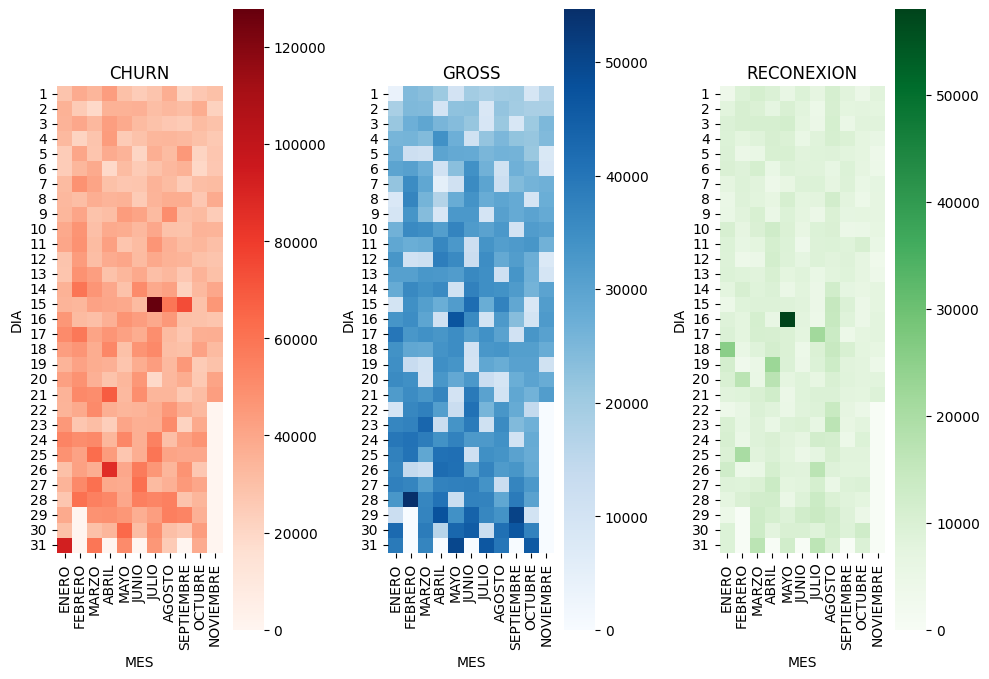

In [ ]:
# Filtrar por tipo
df_churn = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == 'CHURN']
df_gross = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == 'GROSS']
df_reconexion = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == 'RECONEXION']

# Ordenar los meses
meses_ordenados = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO','JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE']

# Crear subplots con disposición horizontal
fig, axs = plt.subplots(1, 3, figsize=(10, 10), subplot_kw={'aspect': 'equal'})

# Heatmap para CHURN
sns.heatmap(df_churn.pivot_table(index='DIA', columns='MES', values='CANTIDAD', aggfunc='sum').reindex(columns=meses_ordenados), ax=axs[0], cmap='Reds')
axs[0].set_title('CHURN')

# Heatmap para GROSS
sns.heatmap(df_gross.pivot_table(index='DIA', columns='MES', values='CANTIDAD', aggfunc='sum').reindex(columns=meses_ordenados), ax=axs[1], cmap='Blues')
axs[1].set_title('GROSS')

# Heatmap para RECONEXION
sns.heatmap(df_reconexion.pivot_table(index='DIA', columns='MES', values='CANTIDAD', aggfunc='sum').reindex(columns=meses_ordenados), ax=axs[2], cmap='Greens')
axs[2].set_title('RECONEXION')

plt.tight_layout()
plt.show()



En el heatmap se observa celdas con colores más oscuros en ciertos meses y días, lo cual significa que hubo una mayor cantidad de clientes de acuerdo al tipo en esos momentos específicos. Mientras los colores más claros indica que hubo menos cantidad de clientes. Con lo anterior, el gross se concentra mas al final del mes en casi todos los meses del dataframe.

**Estadística descriptiva**

In [ ]:
# Estadísticas descriptivas por tipo
describe_tipo = df_prepagado_mobile.groupby('TIPO').describe()

print("Estadísticas descriptivas por tipo:\n", describe_tipo)

Estadísticas descriptivas por tipo:
            FECHA                                                      \
           count                           mean                  min   
TIPO                                                                   
CHURN       4816  2023-06-11 06:58:18.338870272  2023-01-01 00:00:00   
GROSS       3215  2023-06-09 22:45:12.037325312  2023-01-01 00:00:00   
RECONEXION  1471  2023-06-12 22:01:32.997960960  2023-01-01 00:00:00   

                                                                           \
                            25%                  50%                  75%   
TIPO                                                                        
CHURN       2023-03-23 00:00:00  2023-06-11 00:00:00  2023-08-31 00:00:00   
GROSS       2023-03-21 00:00:00  2023-06-09 00:00:00  2023-08-30 00:00:00   
RECONEXION  2023-03-24 12:00:00  2023-06-14 00:00:00  2023-09-01 00:00:00   

                                     CANTIDAD                      

**¿Qué tan dispersos están los valores alrededor de la media?**

In [ ]:
# Calcular la desviación estándar por tipo
std_tipo = df_prepagado_mobile.groupby('TIPO')['CANTIDAD'].std()

# Imprimir el resultado
print("Desviación estándar por tipo:")
print(std_tipo)

Desviación estándar por tipo:
TIPO
CHURN         7530.673164
GROSS         7826.398991
RECONEXION    4123.091666
Name: CANTIDAD, dtype: float64


In [ ]:
# Filtrar dataframe para excluir outliers por tipo
df_filtered = df_prepagado_mobile.groupby('TIPO').apply(lambda x: x[(x['CANTIDAD'] >= x['CANTIDAD'].quantile(0.05)) & (x['CANTIDAD'] <= x['CANTIDAD'].quantile(0.95))]).reset_index(drop=True)

# Crear boxplot interactivo con Plotly
fig = px.box(df_filtered, x='TIPO', y='CANTIDAD', title='Boxplot de Cantidad por Tipo (sin outliers)')
fig.update_layout(xaxis_title='Tipo', yaxis_title='Cantidad')
fig.show()



1.   CHURN: Indica que los datos tienden a estar mas dispersos alrededor de la media en un rango mas amplio, lo cual sugiere una mayor variabilidad.
2.   GROSS: también tienden a estar dispersos alrededor de la media en un rango similar al de 'CHURN', con una variabilidad considerable.
3.   RECONEXIÓN:  tienen una dispersión más baja en comparación con 'CHURN' y 'GROSS', lo que sugiere una menor variabilidad en la cantidad de reconexión.

Una desviación estándar más alta indica una mayor dispersión de los datos alrededor de la media, mientras que una desviación estándar más baja indica una dispersión más estrecha de los datos.



**¿Cómo varía la correlación entre las variables numéricas para cada tipo en mi conjunto de datos?**

Correlación:
                 CANTIDAD  TIPO_CHURN  TIPO_GROSS  TIPO_RECONEXION
CANTIDAD         1.000000    0.001021    0.025241        -0.034427
TIPO_CHURN       0.001021    1.000000   -0.724955        -0.433874
TIPO_GROSS       0.025241   -0.724955    1.000000        -0.306049
TIPO_RECONEXION -0.034427   -0.433874   -0.306049         1.000000


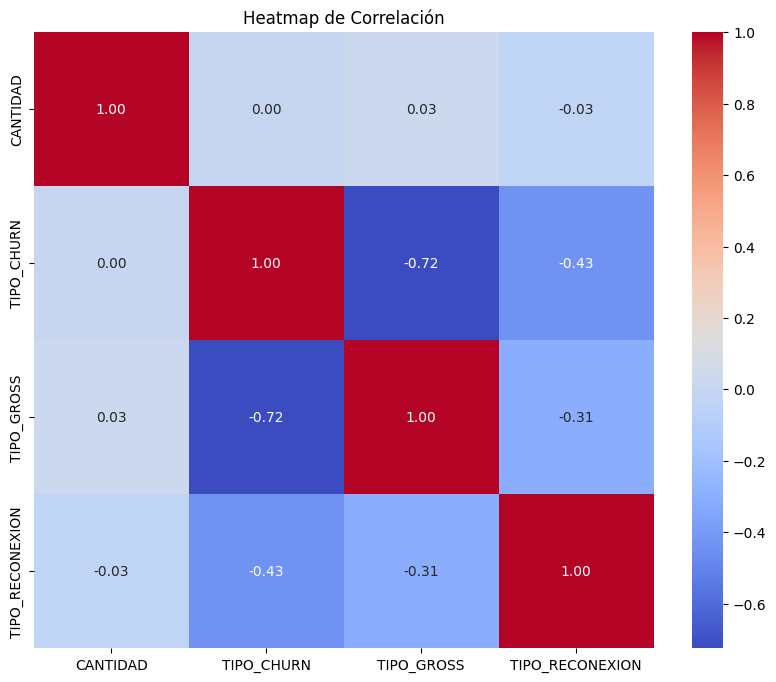

In [ ]:
# Convertir variables categóricas en variables dummy
df_dummy = pd.get_dummies(df_prepagado_mobile, columns=['TIPO'])

# Mantener solo las columnas de cantidad y las columnas dummy resultantes de TIPO
df_corr = df_dummy[['CANTIDAD'] + list(df_dummy.columns[df_dummy.columns.str.startswith('TIPO_')])]

# Calcular correlación entre todas las variables
correlation_matrix = df_corr.corr()

print("Correlación:")
print(correlation_matrix)

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación')
plt.show()





1.   La correlación entre "TIPO_CHURN" y "TIPO_GROSS" es de -0.72, lo que sugiere una correlación negativa moderada entre estos dos tipos. Esto significa que es probable que los clientes que pertenecen al grupo de "CHURN" tengan una tendencia diferente a los clientes del grupo "GROSS".
2.   La correlación entre "TIPO_CHURN" y "TIPO_RECONEXION" es de -0.43, lo que también indica una correlación negativa moderada. Esto sugiere que los clientes que pertenecen al grupo de "CHURN" tienen una tendencia diferente a los clientes del grupo "RECONEXION".
3.   La correlación entre "TIPO_GROSS" y "TIPO_RECONEXION" es de -0.31, lo que sugiere una correlación negativa débil entre estos dos tipos. Esto indica que los clientes que pertenecen al grupo de "GROSS" podrían tener una tendencia ligeramente diferente a los clientes del grupo "RECONEXION".

La correlación nos indica la fuerza y dirección de la relación lineal entre variables.  Las correlaciones entre los tipos indican que hay cierta relación entre ellos, pero no es extremadamente fuerte.



**¿Las muestras de la columna 'CANTIDAD', agrupadas por cada tipo en el dataframe, siguen una distribución normal?**

In [ ]:
# Lista para almacenar los resultados de la prueba de normalidad por tipo
normality_results = []

# Iterar sobre cada tipo
for tipo in df_prepagado_mobile['TIPO'].unique():
    # Obtener los datos de la columna 'CANTIDAD' para el tipo actual
    data = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == tipo]['CANTIDAD']

    # Realizar la prueba de normalidad
    normality_test = stats.normaltest(data)

    # Almacenar los resultados en la lista
    normality_results.append((tipo, normality_test.statistic, normality_test.pvalue))

# Imprimir
print("Resultados de la prueba de normalidad por tipo:")
for result in normality_results:
    tipo, statistic, pvalue = result
    print(f"Tipo: {tipo}, Estadístico de la prueba: {statistic}, Valor p: {pvalue}")


Resultados de la prueba de normalidad por tipo:
Tipo: GROSS, Estadístico de la prueba: 2008.777103399688, Valor p: 0.0
Tipo: CHURN, Estadístico de la prueba: 4301.438673055978, Valor p: 0.0
Tipo: RECONEXION, Estadístico de la prueba: 1136.6097052856994, Valor p: 1.542902413425686e-247


Ninguna de las muestra siguen una distribución normal, ya que los valores de p son muy bajos (cercanos a cero). Para el caso de RECONEXIÓN, el valor p es extremadamente bajo, lo que suguiere una fuerte evidencia en contra de la hipótesis nula de normalidad.

**¿Cómo puedo comparar la variable numérica 'CANTIDAD' entre los diferentes tipos presentes en mi DataFrame y determinar si hay diferencias significativas entre ellos?**

In [ ]:
# Tipos únicos en el DataFrame
tipos = df_prepagado_mobile['TIPO'].unique()

# Realizar las pruebas para cada tipo por separado
for tipo in tipos:
    print(f"Tipo: {tipo}")

    # Filtrar el DataFrame por el tipo actual
    df_tipo = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == tipo]

    # Prueba de normalidad
    normality_test = stats.normaltest(df_tipo['CANTIDAD'])
    print(f"Prueba de normalidad: {normality_test}")

    # Prueba t de Student contra 'GROSS'
    if tipo != 'GROSS':  # Evitar comparación contra sí mismo
        t_test_result = stats.ttest_ind(df_tipo['CANTIDAD'], df_prepagado_mobile[df_prepagado_mobile['TIPO'] == 'GROSS']['CANTIDAD'])
        print(f"Prueba t de Student contra 'GROSS': {t_test_result}")

    # Prueba de análisis de varianza (ANOVA) contra los otros tipos
    tipos_sin_actual = tipos[tipos != tipo]  # Excluir el tipo actual
    anova_data = [df_prepagado_mobile[df_prepagado_mobile['TIPO'] == t]['CANTIDAD'] for t in tipos_sin_actual]
    anova_result = stats.f_oneway(*anova_data)
    print(f"Análisis de varianza (ANOVA) contra los otros tipos: {anova_result}")

    print("\n")


Tipo: GROSS
Prueba de normalidad: NormaltestResult(statistic=2008.777103399688, pvalue=0.0)
Análisis de varianza (ANOVA) contra los otros tipos: F_onewayResult(statistic=8.221968663048477, pvalue=0.004152395749011675)


Tipo: CHURN
Prueba de normalidad: NormaltestResult(statistic=4301.438673055978, pvalue=0.0)
Prueba t de Student contra 'GROSS': TtestResult(statistic=-1.4213439322382506, pvalue=0.1552556357723572, df=8029.0)
Análisis de varianza (ANOVA) contra los otros tipos: F_onewayResult(statistic=14.887949313058169, pvalue=0.00011562367517289089)


Tipo: RECONEXION
Prueba de normalidad: NormaltestResult(statistic=1136.6097052856994, pvalue=1.542902413425686e-247)
Prueba t de Student contra 'GROSS': TtestResult(statistic=-3.8584905485251833, pvalue=0.00011562367517298568, df=4684.0)
Análisis de varianza (ANOVA) contra los otros tipos: F_onewayResult(statistic=2.020218573710498, pvalue=0.1552556357720008)






1.   Para los tipos 'GROSS', 'CHURN' y 'RECONEXION': La variable 'CANTIDAD' no sigue una distribución normal, lo que sugiere que los datos pueden estar sesgados o no seguir una distribución típica. Existen diferencias significativas en la cantidad entre al menos uno de los tipos (GROSS, CHURN y RECONEXION), lo que indica que los grupos pueden tener distintos niveles de cantidad.
2.   Al comparar entre sí los tipos no hay una diferencia significativa en la cantidad entre los tipos 'GROSS' y 'CHURN', pero sí entre 'GROSS' y 'RECONEXION', así como entre 'CHURN' y 'RECONEXION'. Esto sugiere que, aunque dos de los tipos pueden tener cantidades similares, el tercero puede diferir significativamente en términos de cantidad.
3.  La cantidad varía entre los tipos, y hay diferencias significativas entre al menos dos de los tipos en términos de cantidad







**Tabla resumen con los meses de mayor churn**

In [ ]:
# Tabla resumen con los meses con mayor churn
top_churn_meses = df_prepagado_mobile[df_prepagado_mobile['TIPO'] == 'CHURN']['MES'].value_counts().head(5)
print("Top 5 Meses con Mayor Churn:")
print(top_churn_meses)

Top 5 Meses con Mayor Churn:
MES
MAYO       478
AGOSTO     470
OCTUBRE    469
MARZO      464
JULIO      456
Name: count, dtype: int64


## Insight

El análisis de la serie de tiempo y los gráficos de barras muestran claramente que el comportamiento de cada tipo de transacción varía significativamente a lo largo del año 2023. En particular, se observan picos y valles en la cantidad de clientes para cada tipo en diferentes momentos del año, lo que sugiere la influencia de factores estacionales u otros eventos específicos en el comportamiento de los clientes.

En el caso del tipo "GROSS", la estabilidad en la cantidad de clientes a lo largo del tiempo indica una tendencia constante sin grandes fluctuaciones. Esto puede ser una señal de que las transacciones de "GROSS" son más predecibles y menos susceptibles a los cambios estacionales o a eventos externos.

Por otro lado, el tipo "CHURN" muestra una mayor variabilidad en la cantidad de clientes, con meses atípicos donde se observa un aumento significativo en el abandono de clientes. Estos meses coinciden con eventos específicos como el final de trimestres o períodos de vacaciones, lo que puede indicar una estacionalidad en el comportamiento de los clientes.

Para el tipo "RECONEXION", se observan también meses con cifras inusualmente altas, lo que puede sugerir la presencia de eventos o campañas de marketing específicas que llevan a una mayor cantidad de clientes que vuelven a conectarse.

Con los diferentes gráficos y herramientas utilizadas se concluye:

1. Variabilidad en la cantidad por tipo: Existe una variabilidad considerable en la cantidad entre los diferentes tipos de transacciones (GROSS, CHURN, RECONEXION). Esto puede indicar diferentes comportamientos de los usuarios o clientes en función del tipo de transacción.

2. Distribución de la cantidad: La cantidad de transacciones no sigue una distribución normal para ningún tipo. Esto sugiere que los datos pueden estar sesgados o influenciados por factores externos.

3. Diferencias significativas entre tipos: Se encontraron diferencias significativas en la cantidad entre al menos dos de los tipos (GROSS, CHURN, RECONEXION). Esto sugiere que cada tipo de transacción puede tener un impacto diferente en la cantidad.

4. Comparación entre tipos: Aunque dos tipos (por ejemplo, GROSS y CHURN) pueden tener cantidades similares, el tercer tipo (por ejemplo, RECONEXION) puede diferir significativamente en términos de cantidad. Esto podría indicar patrones distintos de comportamiento o preferencias de los usuarios para cada tipo de transacción.


En resumen, el análisis de los diferentes tipos de transacciones proporciona una visión más completa del comportamiento de los clientes a lo largo del tiempo, destacando las diferencias en la estacionalidad, tendencias y eventos específicos que pueden afectar la cantidad de clientes en cada categoría. Esto puede ser útil para desarrollar estrategias de negocio más efectivas y adaptadas a las necesidades y comportamientos cambiantes de los clientes.

### Pruebas de estacionalidad

In [ ]:
# Crear una copia del DataFrame
df = df_prepagado_mobile.copy()

In [ ]:
# Crear una copia para cada tipo
df_churn = df[df['TIPO'] == 'CHURN']
df_gross = df[df['TIPO'] == 'GROSS']
df_reconexion = df[df['TIPO'] == 'RECONEXION']

# Serie temporal de CHURN
result1 = adfuller(df_churn['FECHA'])
result2 = adfuller(df_gross['FECHA'])
result3 = adfuller(df_reconexion['FECHA'])

print('ADF Statistic Churn:', result1[0])
print('p-value Churn:', result1[1])

print('ADF Statistic Gross:', result2[0])
print('p-value Gross:', result2[1])

print('ADF Statistic Reconexion:', result3[0])
print('p-value Reconexion:', result3[1])


ADF Statistic Churn: 13.242537680211585
p-value Churn: 1.0
ADF Statistic Gross: 12.759314842993362
p-value Gross: 1.0
ADF Statistic Reconexion: 16.23745047530615
p-value Reconexion: 1.0


Todos los resultados muestran valores positivos para el estadístico ADF y un valor p de 1. Esto implica que estadísticamente no son estacionarias en sus formas actuales y no muestra patrones estacionarios claros en los datos evaluados.

## Machine Learning

In [ ]:
df_prepagado_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 3 to 27539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        9502 non-null   datetime64[ns]
 1   DIA          9502 non-null   category      
 2   DESCRIPCION  9502 non-null   category      
 3   MES          9502 non-null   category      
 4   DIA_SEM      9502 non-null   category      
 5   Weekday      9502 non-null   category      
 6   Month        9502 non-null   category      
 7   TIPO         9502 non-null   object        
 8   CANTIDAD     9502 non-null   float64       
dtypes: category(6), datetime64[ns](1), float64(1), object(1)
memory usage: 355.5+ KB


In [ ]:
# Crear una copia del DataFrame
df_copy = df_prepagado_mobile.copy()

# Convertir las columnas 'FECHA', 'TIPO', y 'CANTIDAD' al tipo adecuado
df_copy['FECHA'] = pd.to_datetime(df_copy['FECHA'])
df_copy['TIPO'] = df_copy['TIPO'].astype(str)
df_copy['CANTIDAD'] = df_copy['CANTIDAD'].astype(int)

# Agrupar por fecha y tipo, sumando la cantidad
df_grouped = df_copy.groupby(['FECHA', 'TIPO']).sum('CANTIDAD').reset_index()

# Mostrar el DataFrame resultante
print(df_grouped)


         FECHA        TIPO  CANTIDAD
0   2023-01-01       CHURN     28385
1   2023-01-01       GROSS      3684
2   2023-01-01  RECONEXION      3680
3   2023-01-02       CHURN     35790
4   2023-01-02       GROSS     18774
..         ...         ...       ...
970 2023-11-20       GROSS     27839
971 2023-11-20  RECONEXION      7952
972 2023-11-21       CHURN     43149
973 2023-11-21       GROSS     31466
974 2023-11-21  RECONEXION      9261

[975 rows x 3 columns]


### RandomForestClassifier

In [ ]:
# Convertir la columna TIPO a valores numéricos utilizando LabelEncoder
label_encoder = LabelEncoder()
df_encoder= df_grouped.copy()
df_encoder['TIPO_ENCODED'] = label_encoder.fit_transform(df_grouped['TIPO'])

# Definir nuestras características (X) y etiquetas (y)
X = df_encoder[['CANTIDAD']]
y = df_encoder['TIPO_ENCODED']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de clasificación (Random Forest Classifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.62      0.64      0.63        67
           1       0.53      0.48      0.50        67
           2       0.83      0.90      0.87        61

    accuracy                           0.67       195
   macro avg       0.66      0.67      0.67       195
weighted avg       0.66      0.67      0.66       195



En este caso, la precisión varía para cada clase, siendo la clase 2 la que tiene una precisión y recall más altos. Sin embargo, la precisión general del modelo es del 67%, lo que indica que puede haber margen de mejora en la clasificación de todas las clases.

### Arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

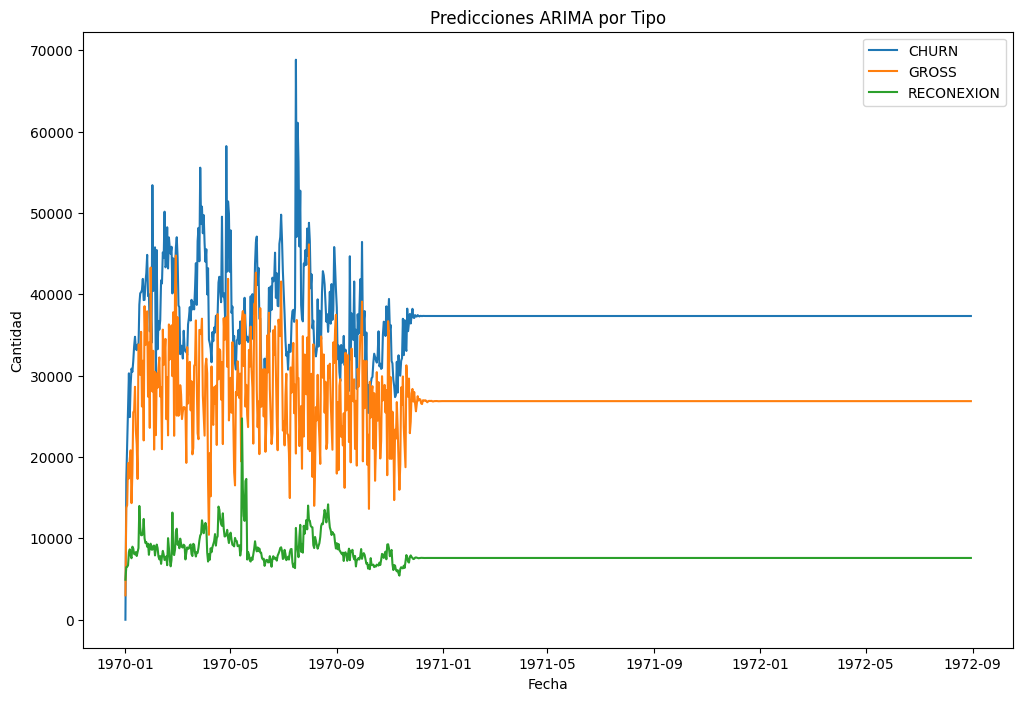

In [ ]:
# FECHA a tipo datetime
df_arima = df_grouped.copy()
df_arima['FECHA'] = pd.to_datetime(df_arima['FECHA'])

# Diccionario para almacenar los resultados de los modelos ARIMA por tipo
arima_models = {}

# Filtro por cada tipo de observación
for tipo in df_arima['TIPO'].unique():
    df_tipo = df_arima[df_arima['TIPO'] == tipo]

    # Establecemos la columna FECHA como índice
    df_tipo.set_index('FECHA', inplace=True)

    # Entrenamos el modelo ARIMA
    model = ARIMA(df_tipo['CANTIDAD'], order=(5,1,0)) # Usar un orden apropiado para ARIMA
    model_fit = model.fit()

    # Almacenamos el modelo ajustado en el diccionario
    arima_models[tipo] = model_fit


# Visualizar los datos originales y las predicciones
plt.figure(figsize=(12, 8))

for tipo, model in arima_models.items():
    # Obtener las fechas y las predicciones
    all_dates = df_arima[df_arima['TIPO'] == tipo].index
    predictions = model.predict(start=all_dates.min(), end=all_dates.max(), typ='levels')

    # Obtener solo las fechas para las que se han realizado predicciones
    predicted_dates = pd.date_range(start=all_dates.min(), periods=len(predictions))

    # Visualizar las predicciones
    plt.plot(predicted_dates, predictions, label=tipo)

plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Predicciones ARIMA por Tipo')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



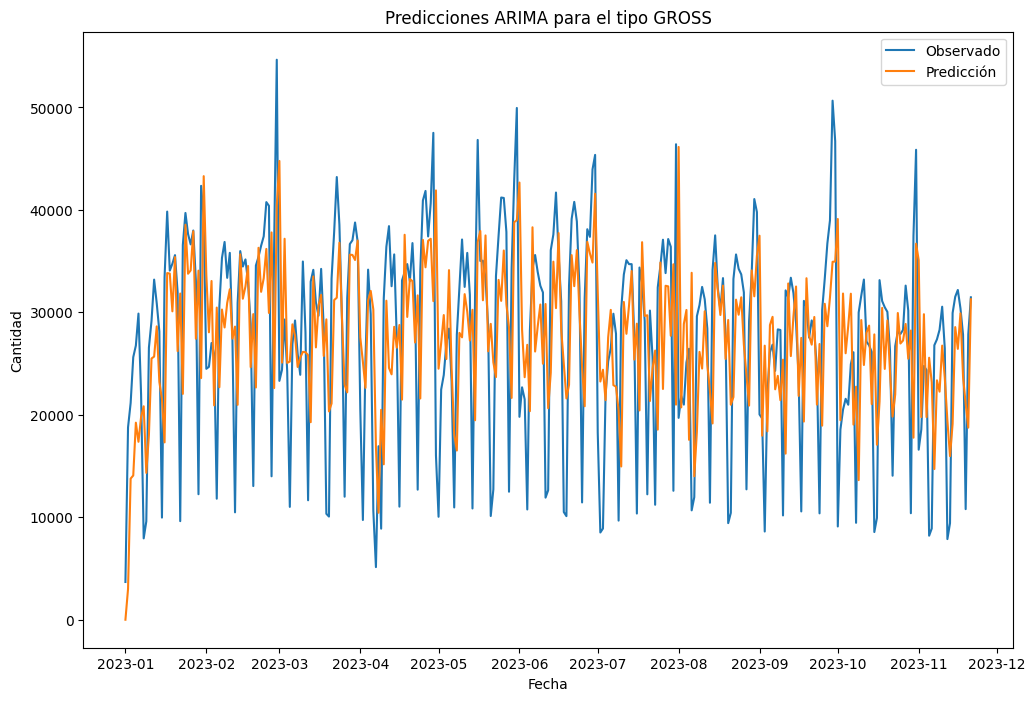

In [ ]:
# Agrupamos por fecha y tipo
df_arima_gross=df_grouped.copy()
df_arima_gross= df_arima_gross.groupby(['FECHA', 'TIPO']).sum().reset_index()

# Filtramos el DataFrame solo para el tipo 'GROSS'
df_gross = df_arima_gross[df_arima_gross['TIPO'] == 'GROSS']

# Establecemos la columna FECHA como índice
df_gross.set_index('FECHA', inplace=True)

# Ajustamos el modelo ARIMA para el tipo 'GROSS'
model = ARIMA(df_gross['CANTIDAD'], order=(5, 1, 0))
model_fit = model.fit()

# Hacemos predicciones y visualizamos los resultados
predictions = model_fit.predict(start=min(df_gross.index), end=max(df_gross.index), typ='levels')

plt.figure(figsize=(12, 8))
plt.plot(df_gross.index, df_gross['CANTIDAD'], label='Observado')
plt.plot(df_gross.index, predictions, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Predicciones ARIMA para el tipo GROSS')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



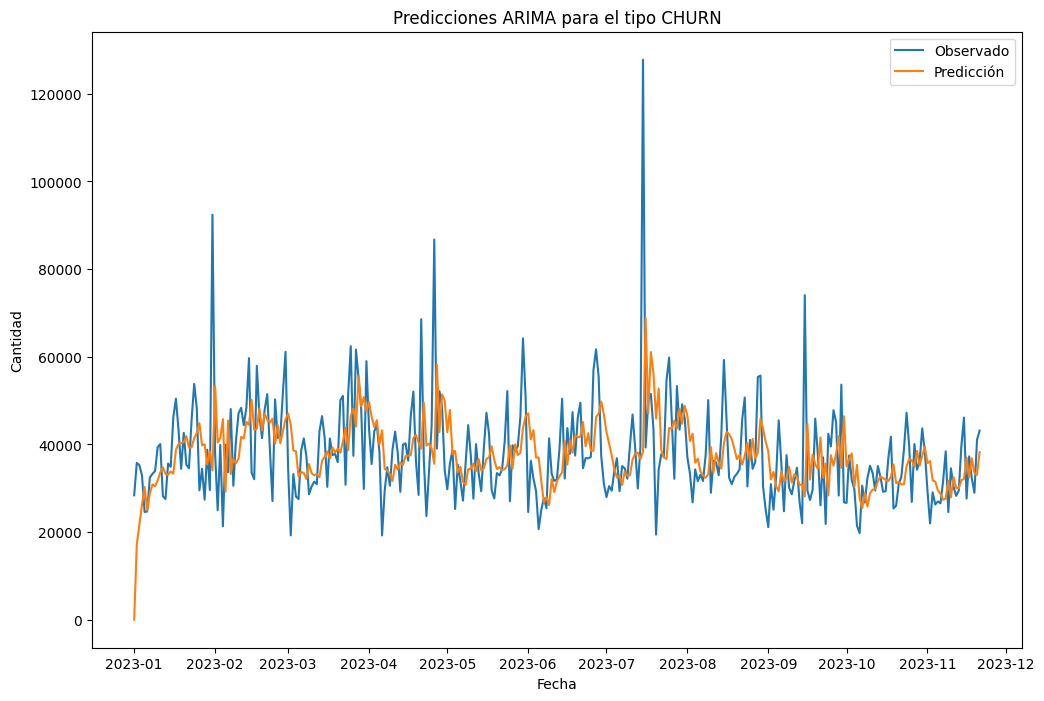

In [ ]:
# Agrupar por fecha y tipo
df_arima_churn=df_grouped.copy()
df_arima_churn= df_arima_churn.groupby(['FECHA', 'TIPO']).sum().reset_index()

# Filtrar el DataFrame solo para el tipo 'CHURN'
df_churn = df_arima_churn[df_arima_churn['TIPO'] == 'CHURN']

# Columna FECHA como índice
df_churn.set_index('FECHA', inplace=True)

# Modelo ARIMA para el tipo 'CHURN'
model = ARIMA(df_churn['CANTIDAD'], order=(5, 1, 0))
model_fit = model.fit()

# Predicciones y visualizamos los resultados
predictions = model_fit.predict(start=min(df_churn.index), end=max(df_churn.index), typ='levels')

plt.figure(figsize=(12, 8))
plt.plot(df_churn.index, df_churn['CANTIDAD'], label='Observado')
plt.plot(df_churn.index, predictions, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Predicciones ARIMA para el tipo CHURN')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



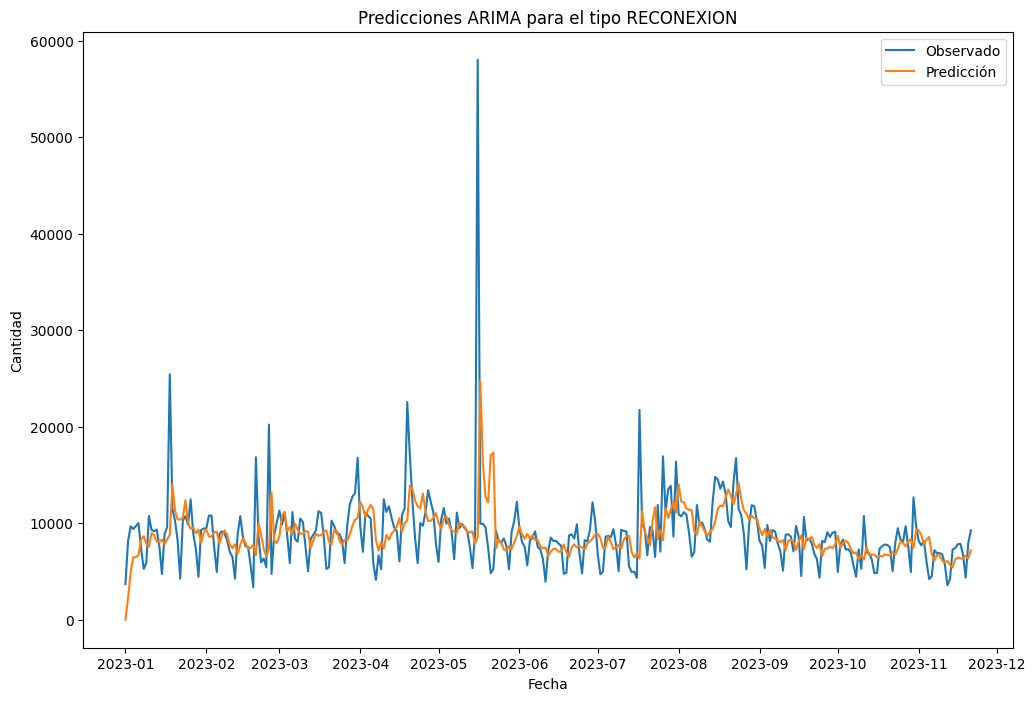

In [ ]:
# Agrupar por fecha y tipo
df_arima_rec=df_grouped.copy()
df_arima_rec= df_arima_rec.groupby(['FECHA', 'TIPO']).sum().reset_index()

# Filtrar el DataFrame solo para el tipo 'RECONEXION'
df_rec = df_arima_rec[df_arima_rec['TIPO'] == 'RECONEXION']

# Columna FECHA como índice
df_rec.set_index('FECHA', inplace=True)

# Modelo ARIMA para el tipo 'RECIONEXION'
model = ARIMA(df_rec['CANTIDAD'], order=(5, 1, 0))
model_fit = model.fit()

# Predicciones y visualizamos los resultados
predictions = model_fit.predict(start=min(df_rec.index), end=max(df_rec.index), typ='levels')

plt.figure(figsize=(12, 8))
plt.plot(df_rec.index, df_rec['CANTIDAD'], label='Observado')
plt.plot(df_rec.index, predictions, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Predicciones ARIMA para el tipo RECONEXION')
plt.legend()
plt.show()


### xgboost

In [ ]:
# Crear una copia
df_xgboost = df_grouped.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df_xgboost['TIPO_ENCODED'] = label_encoder.fit_transform(df_xgboost['TIPO'])

# Eliminar la columna 'FECHA'
df_xgboost.drop(columns=['FECHA'], inplace=True)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_xgboost.drop(columns=['TIPO', 'TIPO_ENCODED'])
y = df_xgboost['TIPO_ENCODED']

# Entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.66      0.63        67
           1       0.53      0.46      0.49        67
           2       0.88      0.92      0.90        61

    accuracy                           0.67       195
   macro avg       0.67      0.68      0.67       195
weighted avg       0.66      0.67      0.67       195



### Support Vector Machines (SVM)

In [ ]:
# Copia del dataframe
df_svm = df_grouped.copy()

# Codificar la variable categórica TIPO
df_svm['TIPO_ENCODED'] = df_svm['TIPO'].astype('category').cat.codes

# Definir las características (X) y las etiquetas (y)
X = df_svm.drop(['FECHA', 'TIPO', 'TIPO_ENCODED'], axis=1)  # características
y = df_svm['TIPO_ENCODED']  # etiquetas

# Entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo SVM
model = SVC(kernel='linear', random_state=42)  # kernel lineal
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.79      0.67        67
           1       0.47      0.24      0.32        67
           2       0.81      0.93      0.87        61

    accuracy                           0.65       195
   macro avg       0.62      0.65      0.62       195
weighted avg       0.62      0.65      0.61       195



## Evaluación ML

In [ ]:
# Mostrar el dataframe inicial

df_prepagado_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 3 to 27539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        9502 non-null   datetime64[ns]
 1   DIA          9502 non-null   category      
 2   DESCRIPCION  9502 non-null   category      
 3   MES          9502 non-null   category      
 4   DIA_SEM      9502 non-null   category      
 5   Weekday      9502 non-null   category      
 6   Month        9502 non-null   category      
 7   TIPO         9502 non-null   object        
 8   CANTIDAD     9502 non-null   float64       
dtypes: category(6), datetime64[ns](1), float64(1), object(1)
memory usage: 355.5+ KB


In [ ]:
# Copia del dataframe
df_grouped_extended= df_prepagado_mobile.copy()

df_grouped_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 3 to 27539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        9502 non-null   datetime64[ns]
 1   DIA          9502 non-null   category      
 2   DESCRIPCION  9502 non-null   category      
 3   MES          9502 non-null   category      
 4   DIA_SEM      9502 non-null   category      
 5   Weekday      9502 non-null   category      
 6   Month        9502 non-null   category      
 7   TIPO         9502 non-null   object        
 8   CANTIDAD     9502 non-null   float64       
dtypes: category(6), datetime64[ns](1), float64(1), object(1)
memory usage: 355.5+ KB


### RandomForest

In [ ]:
# Copia dataframe
df_random = df_grouped_extended.copy()

# Codificación de variables categóricas utilizando One-Hot Encoding
X_encoded = pd.get_dummies(df_random.drop(columns=['FECHA', 'TIPO', 'CANTIDAD']), drop_first=True)

# Definir la variable objetivo
y = df_random['TIPO']

# Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo Random Forest Classifier con las variables codificadas
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo de Random Forest
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

       CHURN       1.00      1.00      1.00      1016
       GROSS       0.91      0.90      0.90       597
  RECONEXION       0.79      0.82      0.81       288

    accuracy                           0.94      1901
   macro avg       0.90      0.91      0.90      1901
weighted avg       0.94      0.94      0.94      1901



### xgboost

In [ ]:
# Crear una copia del dataframe
df_xgboost = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df_xgboost['TIPO_ENCODED'] = label_encoder.fit_transform(df_xgboost['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df_xgboost.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df_xgboost.drop(columns=['TIPO_ENCODED']))
y = df_xgboost['TIPO_ENCODED']

# Entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       1.00      0.99      0.99       597
           2       0.98      1.00      0.99       288

    accuracy                           1.00      1901
   macro avg       0.99      1.00      0.99      1901
weighted avg       1.00      1.00      1.00      1901



### Support Vector Machines (SVM)

In [ ]:
# Crear una copia del dataframe
df_svm = df_grouped_extended.copy()

# Codificar variables categóricas en variables dummy
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(df_svm.drop(columns=['FECHA', 'TIPO']))
y = df_svm['TIPO']

# Dividir el conjunto de datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Balanceo de clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Inicializar y entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo SVM
print("Support Vector Machines (SVM):")
print(classification_report(y_test, y_pred_svm))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Support Vector Machines (SVM):
              precision    recall  f1-score   support

       CHURN       1.00      1.00      1.00      1016
       GROSS       1.00      0.89      0.94       597
  RECONEXION       0.81      1.00      0.90       288

    accuracy                           0.96      1901
   macro avg       0.94      0.96      0.95      1901
weighted avg       0.97      0.96      0.97      1901



## FeatureSelection

### Creación de variables sintéticas

In [ ]:
# Crear una copia del dataframe original
df_extended = df_grouped_extended.copy()

# Crear variables temporales adicionales
df_extended['DAY'] = df_extended['FECHA'].dt.day
df_extended['WEEK'] = df_extended['FECHA'].dt.isocalendar().week
df_extended['QUARTER'] = df_extended['FECHA'].dt.quarter

# Crear variables de diferencias y retardos
df_extended['CANTIDAD_DIFF'] = df_extended['CANTIDAD'].diff()
df_extended['CANTIDAD_LAG1'] = df_extended['CANTIDAD'].shift(1)
df_extended['CANTIDAD_LAG2'] = df_extended['CANTIDAD'].shift(2)

# Crear estadísticas agregadas
df_extended['CANTIDAD_ROLLING_MEAN_7'] = df_extended['CANTIDAD'].rolling(window=7).mean()
df_extended['CANTIDAD_ROLLING_STD_7'] = df_extended['CANTIDAD'].rolling(window=7).std()

# Llenar los valores NaN generados por las operaciones de diferencia y retardo

# Columnas categóricas
categorical_cols = df_extended.select_dtypes(include=['category']).columns
for col in categorical_cols:
    df_extended[col] = df_extended[col].cat.add_categories('Missing').fillna('Missing')

# Columnas numéricas
numeric_cols = df_extended.select_dtypes(include=[np.number]).columns
df_extended[numeric_cols] = df_extended[numeric_cols].fillna(0)

print(df_extended.head())



          FECHA DIA    DESCRIPCION    MES    DIA_SEM Weekday Month   TIPO  \
3    2023-01-01   1  Mig Pos a Pre  ENERO  DOMINGO         6     1  GROSS   
9184 2023-01-01   1  Mig Pre a Pos  ENERO  DOMINGO         6     1  CHURN   
9190 2023-01-01   1       Port Out  ENERO  DOMINGO         6     1  CHURN   
9191 2023-01-01   1       Port Out  ENERO  DOMINGO         6     1  CHURN   
9192 2023-01-01   1       Port Out  ENERO  DOMINGO         6     1  CHURN   

      CANTIDAD  DAY  WEEK  QUARTER  CANTIDAD_DIFF  CANTIDAD_LAG1  \
3         13.0    1    52        1            0.0            0.0   
9184      73.0    1    52        1           60.0           13.0   
9190      63.0    1    52        1          -10.0           73.0   
9191       1.0    1    52        1          -62.0           63.0   
9192      15.0    1    52        1           14.0            1.0   

      CANTIDAD_LAG2  CANTIDAD_ROLLING_MEAN_7  CANTIDAD_ROLLING_STD_7  
3               0.0                      0.0             

### RandomForest, XGBoost y SVM

In [ ]:
# Crear una copia del dataframe
df_ml = df_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df_ml['TIPO_ENCODED'] = label_encoder.fit_transform(df_ml['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df_ml.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df_ml.drop(columns=['TIPO_ENCODED'])
y = df_ml['TIPO_ENCODED']

# Aplicar OneHotEncoding a las columnas categóricas
categorical_features = X.select_dtypes(include=['category']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)],
    remainder='passthrough')

# Aplicar el preprocesamiento
X_encoded = preprocessor.fit_transform(X)

# Balanceo de clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Dividir el conjunto de datos balanceado en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Modelos a probar
models = {
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'SVM': SVC()
}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classifier:")
    print(classification_report(y_test, y_pred))
    print("-" * 40)


RandomForest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00      1016
           2       1.00      1.00      1.00       924

    accuracy                           1.00      2890
   macro avg       1.00      1.00      1.00      2890
weighted avg       1.00      1.00      1.00      2890

----------------------------------------
XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       950
           1       1.00      1.00      1.00      1016
           2       0.99      1.00      1.00       924

    accuracy                           1.00      2890
   macro avg       1.00      1.00      1.00      2890
weighted avg       1.00      1.00      1.00      2890

----------------------------------------
SVM Classifier:
              precision    recall  f1-score   support

           0       0.48      0.21      0

RandomForest y XGBoost muestran un rendimiento casi perfecto en las métricas de precisión, recall y f1-score, sugiriendo que son altamente efectivos para el conjunto de datos. El modelo SVM tiene un rendimiento significativamente inferior en comparación con RandomForest y XGBoost, con una precisión global de 0.46.

### Realizar PCA y explorar las cargas de los 2 primeros componentes

In [ ]:
df_grouped_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9502 entries, 3 to 27539
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        9502 non-null   datetime64[ns]
 1   DIA          9502 non-null   category      
 2   DESCRIPCION  9502 non-null   category      
 3   MES          9502 non-null   category      
 4   DIA_SEM      9502 non-null   category      
 5   Weekday      9502 non-null   category      
 6   Month        9502 non-null   category      
 7   TIPO         9502 non-null   object        
 8   CANTIDAD     9502 non-null   float64       
dtypes: category(6), datetime64[ns](1), float64(1), object(1)
memory usage: 355.5+ KB


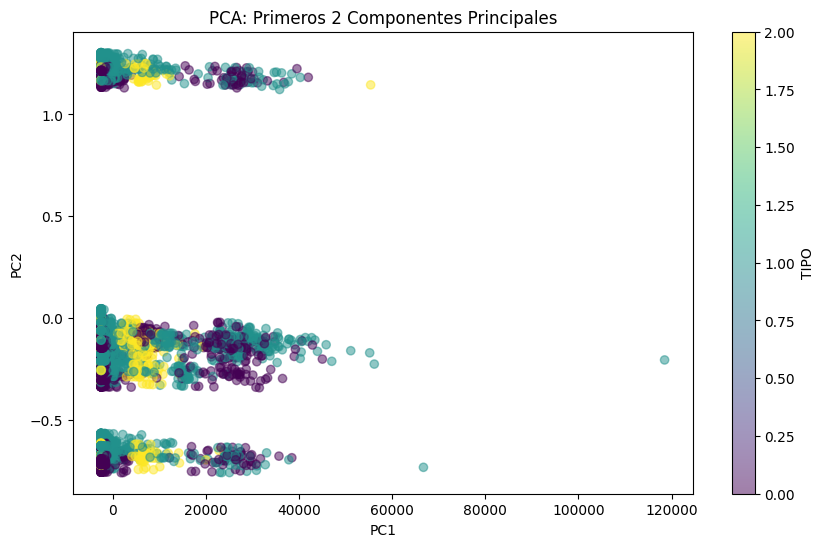

Cargas de los componentes principales:
                   PC1           PC2
CANTIDAD  1.000000e+00 -7.496229e-07
DIA_1    -3.416255e-07 -1.695049e-02
DIA_2    -3.449874e-07 -7.207372e-03
DIA_3    -2.347467e-07  9.118982e-03
DIA_4    -2.260707e-07  2.831537e-03
...                ...           ...
Month_7   2.437776e-07 -9.877388e-03
Month_8  -1.755192e-08  1.016846e-02
Month_9  -3.123461e-07 -8.598805e-03
Month_10 -5.894356e-07  2.348729e-02
Month_11 -2.140244e-07  3.531735e-03

[79 rows x 2 columns]


In [ ]:
# Crear una copia del dataframe original
df_pca = df_grouped_extended.copy()

# Eliminar la columna de fecha
df_pca.drop(columns=['FECHA'], inplace=True)

# Separar las características de la etiqueta
X_pca = df_pca.drop(columns=['TIPO'])
y_pca = df_pca['TIPO']

# Convertir las variables categóricas a numéricas utilizando get_dummies
X_pca = pd.get_dummies(X_pca)

# Rellenar valores nulos
X_pca.fillna(0, inplace=True)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca_transformed = pca.fit_transform(X_pca)

# Crear un DataFrame con los componentes principales
df_pca_result = pd.DataFrame(data=X_pca_transformed, columns=['PC1', 'PC2'])
df_pca_result['TIPO'] = y_pca.reset_index(drop=True)

# Visualizar los dos primeros componentes principales
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], c=pd.factorize(df_pca_result['TIPO'])[0], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='TIPO')
plt.title('PCA: Primeros 2 Componentes Principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Explorar las cargas de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X_pca.columns)
print("Cargas de los componentes principales:")
print(loadings)


El análisis de PCA muestra que CANTIDAD es la variable más significativa en el conjunto de datos, explicando la mayor parte de variabilidad. Las otras variables tienen una influencia mínima en los primeros dos componentes principales.

## Cross Validation

### Validación Simple

In [ ]:
# Crear una copia del dataframe
df = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df['TIPO_ENCODED'] = label_encoder.fit_transform(df['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df.drop(columns=['TIPO_ENCODED']))
y = df['TIPO_ENCODED']

# Dividir el conjunto de datos en entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
print("Performance en el conjunto de prueba:")
print(classification_report(y_test, y_pred))


Performance en el conjunto de prueba:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1016
           1       1.00      0.99      0.99       597
           2       0.98      1.00      0.99       288

    accuracy                           1.00      1901
   macro avg       0.99      1.00      0.99      1901
weighted avg       1.00      1.00      1.00      1901



Los resultados sugieren un alto rendimiento en terminos de precisión, recall y f1-score para todas las clases. La exactitud general del 100% es indicativa de uan clasificación perfecta. Aunque la precisión y el recall de la clase 2 no son perfectas, sigue siendo muy altas, lo que sugiere que el modelo maneja bien las clases minoritarias. La consistencia en las métricas entre diferentes clases indica que el modelo no tiene un sesgo significativo hacia ninguna clase particular.

### Stratified K-fold

In [ ]:
# Crear una copia del dataframe
df_xgboost = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df_xgboost['TIPO_ENCODED'] = label_encoder.fit_transform(df_xgboost['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df_xgboost.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df_xgboost.drop(columns=['TIPO_ENCODED']))
y = df_xgboost['TIPO_ENCODED']

# Inicializar el modelo XGBoost
model = XGBClassifier()

# Configurar Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar el modelo usando Stratified K-Fold Cross-Validation
scores = cross_val_score(model, X_encoded, y, cv=stratified_kfold)
print("Performance con Stratified K-Fold Cross-Validation:")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Entrenamiento y prueba final (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo en el conjunto de prueba
print("Performance en el conjunto de prueba:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Performance con Stratified K-Fold Cross-Validation:
Accuracy: 1.00 (+/- 0.00)
Performance en el conjunto de prueba:
              precision    recall  f1-score   support

       CHURN       1.00      1.00      1.00      1016
       GROSS       1.00      0.99      0.99       597
  RECONEXION       0.98      1.00      0.99       288

    accuracy                           1.00      1901
   macro avg       0.99      1.00      0.99      1901
weighted avg       1.00      1.00      1.00      1901



La validación cruzada k-fold indica que el modelo XGBoost tiene una precisión del 100% en la clasificación de los datos. El valor de +/- 0.00 en la desviación estándar sugiere que esta precisión es consistente a lo largo de los pliegues, lo que significa que el modelo es muy estable y generaliza bien en diferentes subconjuntos de datos

In [ ]:
# Crear una copia del dataframe
df = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df['TIPO_ENCODED'] = label_encoder.fit_transform(df['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df.drop(columns=['TIPO_ENCODED']))
y = df['TIPO_ENCODED']

# Inicializar el modelo
model = RandomForestClassifier()

# Inicializar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Entrenamiento y evaluación con Stratified K-Fold
accuracies = []
for train_index, test_index in skf.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Calcular el promedio de las accuracies
mean_accuracy = sum(accuracies) / len(accuracies)
print("Performance con Stratified K-Fold:")
print("Accuracy:", mean_accuracy)


Performance con Stratified K-Fold:
Accuracy: 0.9957902488994712


La exactitud promedio del 0.996 indica que el modelo RandomForestClassifier clasifica correctamente el 99,6% de las instancias en los diferentes folds. Esto sugiere que el modelo tiene un muy alto rendimiento de predicción correcta de las clases.

#### GradientBoostingClassifier

In [ ]:
# Crear una copia del dataframe
df = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df['TIPO_ENCODED'] = label_encoder.fit_transform(df['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df.drop(columns=['TIPO_ENCODED']))
y = df['TIPO_ENCODED']

# Inicializar el modelo
model = GradientBoostingClassifier()

# Inicializar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Entrenamiento y evaluación con Stratified K-Fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
supports = []

for train_index, test_index in skf.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas de evaluación
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])

    for label in report.keys():
        if label not in ('accuracy', 'macro avg', 'weighted avg'):
            precisions.append(report[label]['precision'])
            recalls.append(report[label]['recall'])
            f1_scores.append(report[label]['f1-score'])
            supports.append(report[label]['support'])

# Calcular el promedio de las métricas
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Performance con Gradient Boosting y Stratified K-Fold:")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-Score:", mean_f1_score)


Performance con Gradient Boosting y Stratified K-Fold:
Accuracy: 0.9970532406766521
Precision: 0.9949161422119654
Recall: 0.9958692490360407
F1-Score: 0.9953830455786054


El modelo Gradient Boosting es muy preciso y consistente para el conjunto de datos.

#### Logistic Regression

In [ ]:
# Crear una copia del dataframe
df = df_grouped_extended.copy()

# Codificar las etiquetas categóricas
label_encoder = LabelEncoder()
df['TIPO_ENCODED'] = label_encoder.fit_transform(df['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df.drop(columns=['TIPO_ENCODED']))
y = df['TIPO_ENCODED']

# Inicializar el modelo
model = LogisticRegression(max_iter=1000)

# Inicializar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Entrenamiento y evaluación con Stratified K-Fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
supports = []

for train_index, test_index in skf.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas de evaluación
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])

    for label in report.keys():
        if label not in ('accuracy', 'macro avg', 'weighted avg'):
            precisions.append(report[label]['precision'])
            recalls.append(report[label]['recall'])
            f1_scores.append(report[label]['f1-score'])
            supports.append(report[label]['support'])

# Calcular el promedio de las métricas
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Performance con Logistic Regression y Stratified K-Fold:")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-Score:", mean_f1_score)



Performance con Logistic Regression y Stratified K-Fold:
Accuracy: 0.9641119632326476
Precision: 0.9458964419039958
Recall: 0.9410205818765938
F1-Score: 0.943329388939348


La regresión logística con Stratified K-fold Cross-Validation ha mostrado un rendimiento alto y consistente con una precisión del 96,4%. Esto indica que es una opción efectiva para el conjunto de datos.

#### Neural Networks (MLPClassifier)

In [ ]:
# Crear una copia del dataframe
df = df_grouped_extended.copy()

# Codificar las etiquetas categóricas en valores numéricos
label_encoder = LabelEncoder()
df['TIPO_ENCODED'] = label_encoder.fit_transform(df['TIPO'])

# Eliminar la columna 'FECHA' y 'TIPO'
df.drop(columns=['FECHA', 'TIPO'], inplace=True)

# Convertir las variables categóricas en variables dummy
X_encoded = pd.get_dummies(df.drop(columns=['TIPO_ENCODED']))
y = df['TIPO_ENCODED']

# Inicializar el modelo
model = MLPClassifier(max_iter=1000)

# Inicializar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Entrenamiento y evaluación con Stratified K-Fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
supports = []

for train_index, test_index in skf.split(X_encoded, y):
    X_train, X_test = X_encoded.iloc[train_index], X_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas de evaluación
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])

    for label in report.keys():
        if label not in ('accuracy', 'macro avg', 'weighted avg'):
            precisions.append(report[label]['precision'])
            recalls.append(report[label]['recall'])
            f1_scores.append(report[label]['f1-score'])
            supports.append(report[label]['support'])

# Calcular el promedio de las métricas
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Performance con Neural Networks y Stratified K-Fold:")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-Score:", mean_f1_score)


Performance con Neural Networks y Stratified K-Fold:
Accuracy: 0.8697046429856862
Precision: 0.8838783817814966
Recall: 0.8625842671321323
F1-Score: 0.8588038843054809


Una precisión de 90.62% sugiere que el modelo de redes neuronales es capaz de clasificar correctamente la mayoría de las instancias, aunque no tan bien como otros modelos